<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 1 - Text Representation </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the first module (Module 1). The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques that were described in the theory portion of the lecture..**



**Guidelines**
* Download `ShakespeareSonnets.txt` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 1 - Text Representation (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Reading the dataset 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `ShakespeareSonnets.txt` into a sting called `sonnets` and perform the following: 

> **Q1.1.** Tokenize the text into individual words or individual tokens and store the result into a variable called `text_tokens`. Make sure to ignore the punctuation characters. Then print the results.

> **Q1.2.** Tokenize the text into individual sentences. Then print the results.

> **Q1.3.**  Encode `text_tokens` using One-Hot Encoding approach and store the encoded tokens into a Dataframe called `one_hot_df`.

> **Q1.4.** Represent the `one_hot_df` using a Bag of words  

> **Q1.5.** Remove the stopwords from the `sonnets` variable and store the results in a variable called `filtered_sonnets`

> **Q1.6.** Create a list called `sonnets_corpus` by splitting the `sonnets` variable into individual sonnets (The result should be 144 sonnets). Then, perform a `TF/IDF` on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.  

> **Q1.7.** Using `nltk.util`'s ngrams module, find the 4-grams of the `sonnets`variable.

### Q1.1. Tokenize the text into individual words or individual tokens and store the result into a variable called text_tokens. Make sure to ignore the punctuation characters. Then print the results.

In [222]:
# Importing the necessary libraries

import warnings 
warnings.filterwarnings ('ignore')

import os 
import gzip 
from collections import Counter 
from pprint import pprint

import pandas as pd 
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

np.random.seed(123)

import string 
import nltk 
import re

from nltk.util import ngrams
from nltk.corpus import stopwords 
from nltk.text import TextCollection 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics.association import BigramAssocMeasures

import sklearn 
from sklearn.manifold import TSNE 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.display import display

from tqdm import tqdm 
tqdm.pandas()

import watermark

%load_ext watermark 
%matplotlib inline

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [179]:
%watermark

Last updated: 2024-09-10T12:12:32.885333-04:00

Python implementation: CPython
Python version       : 3.12.5
IPython version      : 8.27.0

Compiler    : MSC v.1940 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 170 Stepping 4, GenuineIntel
CPU cores   : 14
Architecture: 64bit



In [207]:
# Downloading the 'punkt' tokenizer models from NLTK
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\JOSHIP1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### 1.1.1 Ignoring the punctuation from characters and tokenizing the text into individual words/tokens

In [263]:
# Step 1: Read the file into a string
with open('ShakespearesSonnets.txt', 'r') as file:
    sonnets = file.read()
    
# Step 2: Removing punctuation from the text
# 'maketrans' creates a translation table where punctuation characters are mapped to None (i.e., removed).
translator = str.maketrans('', '', string.punctuation)

# Step 3: Apply the translator to remove punctuation from the 'sonnets' string
# 'translate' applies the translation table to the string, thus cleaning punctuation from the text.
sonnets_cleaned = sonnets.translate(translator)

# Step 4: Tokenize the cleaned text into individual words (tokens)
# 'word_tokenize' splits the cleaned text into individual words (tokens).
text_tokens = nltk.word_tokenize(sonnets_cleaned)
text_tokens = [token for token in text_tokens if token.isalpha()]

In [264]:
display(text_tokens)

['Sonnets',
 'by',
 'William',
 'Shakespeare',
 'Edited',
 'by',
 'Barbara',
 'A',
 'Mowat',
 'and',
 'Paul',
 'Werstine',
 'with',
 'Michael',
 'Poston',
 'and',
 'Rebecca',
 'Niles',
 'Folger',
 'Shakespeare',
 'Library',
 'httpsshakespearefolgeredushakespearesworksshakespearessonnets',
 'Created',
 'on',
 'Jul',
 'from',
 'FDT',
 'version',
 'From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'That',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'But',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'Feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'Thyself',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'And',


### Q 1.2 Tokenize the text into individual sentences. Then print the results.

In [280]:
# Tokenize the cleaned text into individual sentences
# 'sent_tokenize' splits the cleaned text into individual sentences.
# The second argument specifies that the language model is English.
sentences=nltk.sent_tokenize(sonnets,'english')

In [281]:
for sentence in sentences: 
    print(sentence)
    print("\n" + "-"*80 + "\n")

Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1




1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.

--------------------------------------------------------------------------------

But thou, contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.

--------------------------------------------------------------------------------

Thou that art now the world's fresh ornament
And only herald to the gaudy spring
Within thine own bud buriest thy content
And, tender churl, mak'st waste in niggarding.

---------------------------------------

### Q1.3. Encode text_tokens using One-Hot Encoding approach and store the encoded tokens into a Dataframe called one_hot_df.

In [282]:
# One-Hot Encoding for each word in the text
# 'pd.get_dummies' creates a one-hot encoded dataframe where each word in 'text_tokens' is a column.
# Each row in the dataframe will have a binary value (0 or 1), representing the presence of the word in that position.
one_hot_df = pd.DataFrame(pd.get_dummies(text_tokens), columns=text_tokens)
display(one_hot_df)

,Sonnets,by,William,Shakespeare,Edited,by,Barbara,A,Mowat,and,...,my,bad,angel,fire,my,good,one,out,sig,A
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
17810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17811,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Q1.4 Represent the one_hot_df using a Bag of Words

In [283]:
# Step 1: Initialize the CountVectorizer
# 'CountVectorizer' from sklearn creates a bag-of-words model by counting word occurrences.
# This will prepare to count the frequency of each word in the text.
vectorizer = CountVectorizer()

# Step 2: Convert the tokenized words into a single string (text)
text = ' '.join(text_tokens)

# Step 3: Fit and transform the text using the CountVectorizer to create a bag-of-words (BoW) matrix
# 'fit_transform' first learns the vocabulary from the text (fit), then transforms the text into a matrix of token counts (BoW).
bow_matrix = vectorizer.fit_transform([text])


# Step 4: Convert the bag-of-words matrix into a pandas DataFrame for better readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(bow_df)

,abhor,abide,able,about,above,absence,absent,abundance,abundant,abuse,...,youngly,your,yours,yourself,yourselfs,youth,youthful,youths,youve,zealous
0,2,2,1,1,4,5,3,4,1,3,...,1,91,5,9,1,16,2,1,1,1


### Q1.5. Remove the stopwords from the sonnets variable and store the results in a variable called filtered_sonnets

In [231]:
# Download the 'stopwords' dataset from NLTK, which contains common words to be excluded from text analysis
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSHIP1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [289]:
# Load English stopwords from NLTK and create a set for fast lookup
stop_words = set(stopwords.words('english'))

# Tokenize the cleaned sonnets text into individual words
words = nltk.word_tokenize(sonnets_cleaned)
words = [word for word in words if word.isalpha()]

# Filter out stopwords: keep the word in a variable called filtered_sonnets if it's not a stopword, otherwise replace it with an empty string
filtered_sonnets = [word if word.lower() not in stop_words else "" for word in words]

# Create a DataFrame to compare original words with their filtered versions, using 'Original' as the index
pd.DataFrame((zip(words, filtered_sonnets)), columns=['Original', 'Filtered']).set_index( 'Original')

,Filtered
Original,
Sonnets,Sonnets
by,
William,William
Shakespeare,Shakespeare
Edited,Edited
...,...
good,good
one,one
out,


### Q1.6. Create a list called sonnets_corpus by splitting the sonnets variable into individual sonnets (The result should be 144 sonnets). Then, perform a TF/IDF on the resulted list to get the TF/IDF score for all tokens in the corpus. Make sure to remove the punctuation characters.

In [285]:
# Splitting sonnets variable into individual sonnets
sonnets_corpus = sonnets.split('\n\n\n\n\n')
translator = str.maketrans('', '', string.punctuation)
sonnets_corpus_cleaned = [sonnet.translate(translator) for sonnet in sonnets_corpus]

In [286]:
# Print each sonnet with a separator line for readability
for index, sonnet in enumerate(sonnets_corpus):
    print(sonnet)
    print("\n" + "-"*80 + "\n")

Sonnets
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/shakespeares-sonnets/
Created on Jul 31, 2015, from FDT version 0.9.0.1

--------------------------------------------------------------------------------

1

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But, as the riper should by time decease,
His tender heir might bear his memory.
But thou, contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel.
Thou that art now the world's fresh ornament
And only herald to the gaudy spring
Within thine own bud buriest thy content
And, tender churl, mak'st waste in niggarding.
  Pity the world, or else this glutton be--
  To eat the world's due, by the grave and thee.

2

When forty winters shall besie

#### Frequency distribution of unfiltered Sonnets - Sonnets with stopwords

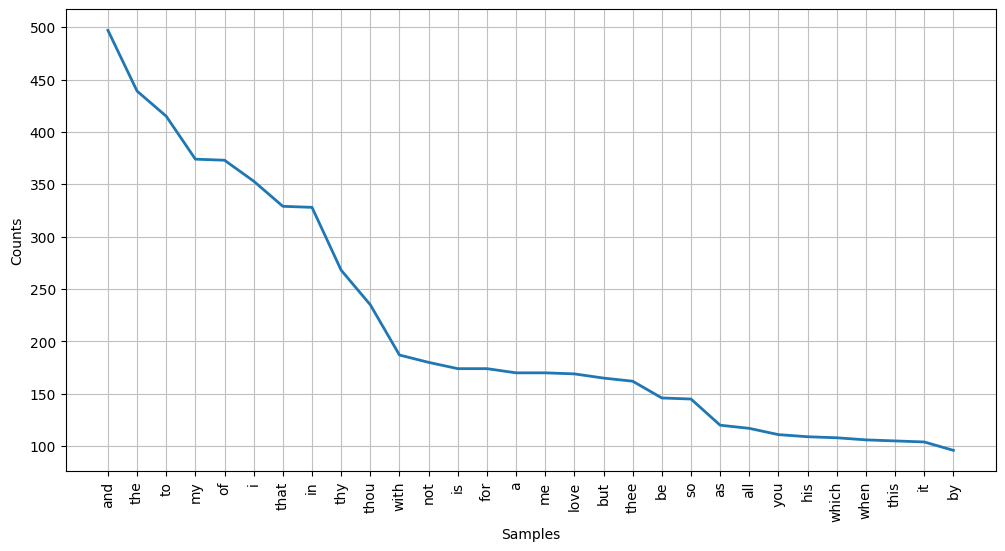

In [291]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

all_tokens = []
for sonnet in sonnets_corpus_cleaned:
    tokens = nltk.word_tokenize(sonnet.lower())
    all_tokens.extend(tokens)

nlp = TextCollection(sonnets_corpus_cleaned)

freq_dist = FreqDist(all_tokens)

plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.show()

#### Frequency distribution of filtered Sonnets - Sonnets with stopwords

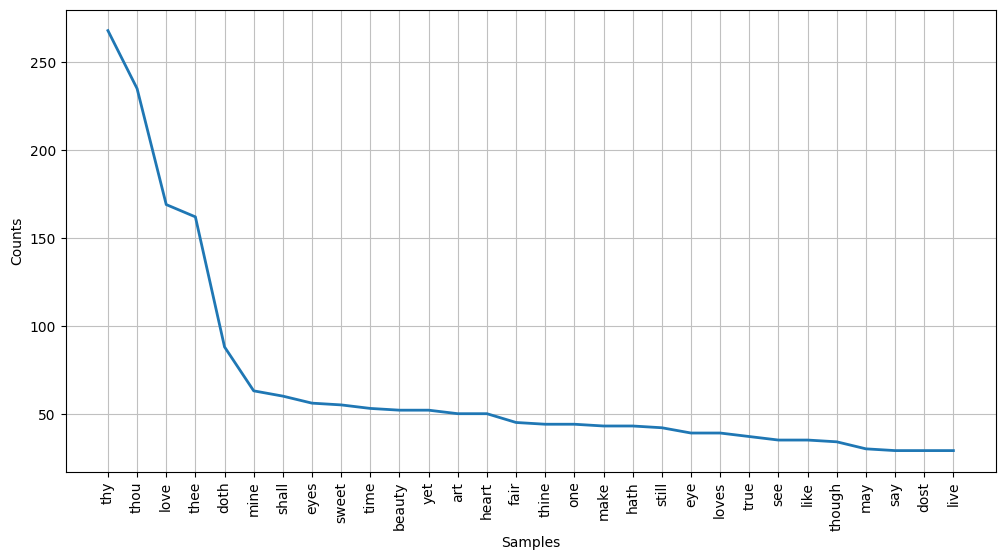

In [197]:
all_tokens = []
for sonnet in filtered_sonnets:
    tokens = nltk.word_tokenize(sonnet.lower())
    all_tokens.extend(tokens)

nlp = TextCollection(filtered_sonnets)

freq_dist = FreqDist(all_tokens)

plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.show()

#### Q 1.6.1 Performing a TF/IDF on the resulted list to get the TF/IDF score

In [296]:
# Perform TF-IDF
# Initialize the TfidfVectorizer to compute TF-IDF scores, excluding common English stopwords
vectorizer = TfidfVectorizer(stop_words='english',  token_pattern=r'\b[a-z]+\b')
tfidf_matrix = vectorizer.fit_transform(sonnets_corpus_cleaned)

# Convert the TF-IDF matrix to a DataFrame with words as columns and TF-IDF scores as values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(tfidf_df)

,abhor,abide,able,absence,absent,abundance,abundant,abuse,abused,abuses,...,yield,yore,young,youngly,yourselfs,youth,youthful,youths,youve,zealous
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003842,0.003842,0.001921,0.009604,0.005763,0.007683,0.001921,0.005763,0.001921,0.001921,...,0.003842,0.001921,0.011525,0.001921,0.001921,0.030734,0.003842,0.001921,0.001921,0.001921


### Q1.7. Using nltk.util's ngrams module, find the 4-grams of the sonnetsvariable.

In [298]:
# Tokenize the cleaned sonnets text into individual words
text_tokens = nltk.word_tokenize(sonnets_cleaned)
text_tokens = [token for token in text_tokens if token.isalpha()]

# Generate 4-grams (sequences of 4 consecutive words) from the tokenized text
four_grams = list(ngrams(text_tokens, 4))

# Print the first 10 4-grams to inspect the output
display(four_grams)

[('Sonnets', 'by', 'William', 'Shakespeare'),
 ('by', 'William', 'Shakespeare', 'Edited'),
 ('William', 'Shakespeare', 'Edited', 'by'),
 ('Shakespeare', 'Edited', 'by', 'Barbara'),
 ('Edited', 'by', 'Barbara', 'A'),
 ('by', 'Barbara', 'A', 'Mowat'),
 ('Barbara', 'A', 'Mowat', 'and'),
 ('A', 'Mowat', 'and', 'Paul'),
 ('Mowat', 'and', 'Paul', 'Werstine'),
 ('and', 'Paul', 'Werstine', 'with'),
 ('Paul', 'Werstine', 'with', 'Michael'),
 ('Werstine', 'with', 'Michael', 'Poston'),
 ('with', 'Michael', 'Poston', 'and'),
 ('Michael', 'Poston', 'and', 'Rebecca'),
 ('Poston', 'and', 'Rebecca', 'Niles'),
 ('and', 'Rebecca', 'Niles', 'Folger'),
 ('Rebecca', 'Niles', 'Folger', 'Shakespeare'),
 ('Niles', 'Folger', 'Shakespeare', 'Library'),
 ('Folger',
  'Shakespeare',
  'Library',
  'httpsshakespearefolgeredushakespearesworksshakespearessonnets'),
 ('Shakespeare',
  'Library',
  'httpsshakespearefolgeredushakespearesworksshakespearessonnets',
  'Created'),
 ('Library',
  'httpsshakespearefolgeredus

#### Visualizing the frequency of 4-grams of the sonnets

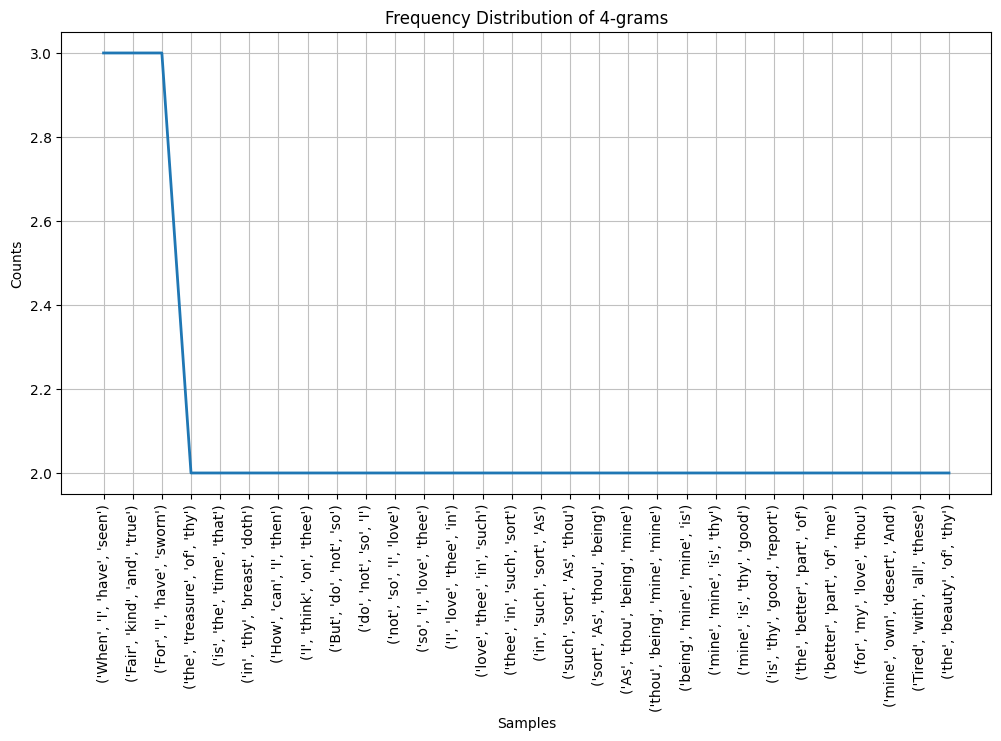

In [299]:
# Using FreqDist to plot the frequency of 4-grams
freq_dist = FreqDist(four_grams)

plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.title('Frequency Distribution of 4-grams')
plt.show()

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

#### A relfection of my experience performing the activity.

Learned perspective on both classiscal literacture and modern computational tools. Combining historical text with cutting-edge techniques helped me to appreciate the richness of language and the utility of the NLP. As far my technical experience was concerned - it helped me clean and tokenize the text. I learned about NLTK and different tools under it. Some challenges that I faced were dealing with the huge size of the corpus. 

#### A reflection on the importance of learning this activity.

This activity helped me understand the importance of data processing and text analytics. I learned that tokenization, removing stopwords, and applying techniques like TF-IDF are foundational to many advanced NLP applications. Understanding these methods helps students and researchers with skills required in other domains like sentiment analysis, business reviews, and chatbots. It empowers us to approach text from multiple perspectives like literary analysis and computational methods.


<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab 1.ipynb** to the **Lab 1 - Text Representation (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection